In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data import

In [2]:
df_APS = pd.read_csv('C:/Adatok/SzKK/Emese csoportja/Greti anyaga/corrected final data/final_table_20240110.csv', sep=';', encoding="ISO-8859-1")

### Data manipulation

1. Collecting disease combinations for each instance

In [3]:
# selection of only the disease data
diseaseOnly = df_APS.copy()
diseaseOnly = diseaseOnly.iloc[:, 6:34]

In [4]:
# to collect all disease combinations
dis_comb_list = []

for i in range(len(diseaseOnly.index)):
    dis_inst = diseaseOnly.iloc[i,:]   
    dis_combs = str(dis_inst[dis_inst == 1].index)
    dis_combs = dis_combs.replace("'", "")
    dis_combs = dis_combs[6:-15]
    dis_comb_list.append(dis_combs)

In [5]:
dis_comb_list[:10]

['[hashimoto, diabetes_mellitus_1]',
 '[hashimoto, crohn]',
 '[hashimoto, vitiligo]',
 '[hashimoto, diabetes_mellitus_1, vitiligo]',
 '[basedow, diabetes_mellitus_1]',
 '[diabetes_mellitus_1, coeliakia]',
 '[basedow, RA]',
 '[hashimoto, early_gonadal_insufficiency, sjögren]',
 '[hashimoto, primer_biliaris_cholangitis]',
 '[hashimoto, diabetes_mellitus_1, hepatitis]']

In [6]:
# to add the results to the df
df_APS['combinations'] = pd.Series(dis_comb_list)

2. For  better visualisation, the content of the 'combinations' column needs to be modified

In [7]:
# dictionary, to replace specific characters
char_replace = {',':' +', '\[':'', '\]':''}

# dictionary, to replace disease names with their abbreviations
disease_rep = {'adrenal':'AD',  
               'autoimmun_gastritis':'AIG', 
               'basedow':'GD', 
               'crohn':'CD', 
               'diabetes_mellitus_1':'T1D', 
               'early_gonadal_insufficiency':'POF', 
               'hashimoto':'HT', 
               'sclerosis_multiplex':'MS', 
               'sjögren':'SS', 
               'vitiligo':'Vit', 
               'coeliakia':'CeD', 
               'colitis_ulcerosa':'UC', 
               'haemolyticus_anaemia':'AIHA', 
               'hypopara':'hypoPT', 
               'primer_antiphospholipid':'PAPS', 
               'psoriasis':'PsO', 
               'ITP':'ITP', 
               'myasthenia_gravis':'MG', 
               'polymyositis':'PM', 
               'primer_biliaris_cholangitis':'PBC', 
               'systemic_sclerosis':'SSc', 
               'sclerosing_cholangitis':'PSC', 
               'alopecia':'Alo', 
               'hepatitis':'AIH', 
               'hypophysitis':'LH', 
               'mucocutan_candidiasis':'CMC'}

# replacing values in the 'combinations' column 
df_APS.replace({'combinations':char_replace}, regex=True, inplace=True)
df_APS.replace({'combinations':disease_rep}, regex=True, inplace=True)

3. separation of the instances in which patiens were younger or older than 18 years old

In [8]:
# instances in which age was known
knownPatients = df_APS.copy()
knownPatients = knownPatients[knownPatients['age_at_disease_onset'] != -1]

# patients, younger than 18
under18 = knownPatients.copy()
under18 = under18[under18['age_at_disease_onset'] < 18]
under18.reset_index(inplace=True, drop=True)

# patients, 18 or older
over18 = knownPatients.copy()
over18 = over18[over18['age_at_disease_onset'] >= 18]
over18.reset_index(inplace=True, drop=True)

In [9]:
# frequency of the disease combinations - UNDER 18
comb_freq_under18 = under18.groupby('combinations', as_index=False).count()[['combinations', 'adrenal']]
comb_freq_under18 = comb_freq_under18.sort_values('adrenal', ascending=False)
comb_freq_under18.rename(columns = {'adrenal':'count'}, inplace=True)
comb_freq_under18['percentage'] = comb_freq_under18['count'] / comb_freq_under18['count'].sum() * 100

# frequency of the disease combinations - over 18
comb_freq_over18 = over18.groupby('combinations', as_index=False).count()[['combinations', 'adrenal']]
comb_freq_over18 = comb_freq_over18.sort_values('adrenal', ascending=False)
comb_freq_over18.rename(columns = {'adrenal':'count'}, inplace=True)
comb_freq_over18['percentage'] = comb_freq_over18['count'] / comb_freq_over18['count'].sum() * 100

4. creating a new coulmn with age categories (minors vs adults)

In [10]:
# creating a column for the age categories
ageRank_list = []

for age in range(len(df_APS.index)):
    if df_APS['age_at_disease_onset'][age] == -1:
        ageRank_list.append('unknown')
    elif df_APS['age_at_disease_onset'][age] < 18:
        ageRank_list.append('under 18')
    else:
        ageRank_list.append('over 18')

# adding the results to the df
df_APS['age_rank'] = pd.Series(ageRank_list)

In [11]:
# creating a df to plot the different age categories
ageRank_grouped = df_APS.groupby('age_rank', as_index=False).count()[['age_rank', 'adrenal']]
ageRank_grouped.rename(columns = {'adrenal':'count'}, inplace=True)

### Visualisation

In [12]:
# color map for subplot A
cmapA = ['#aaf0d1', '#87ceeb', '#ffdab9']

Text(-0.08, 0.44, 'C')

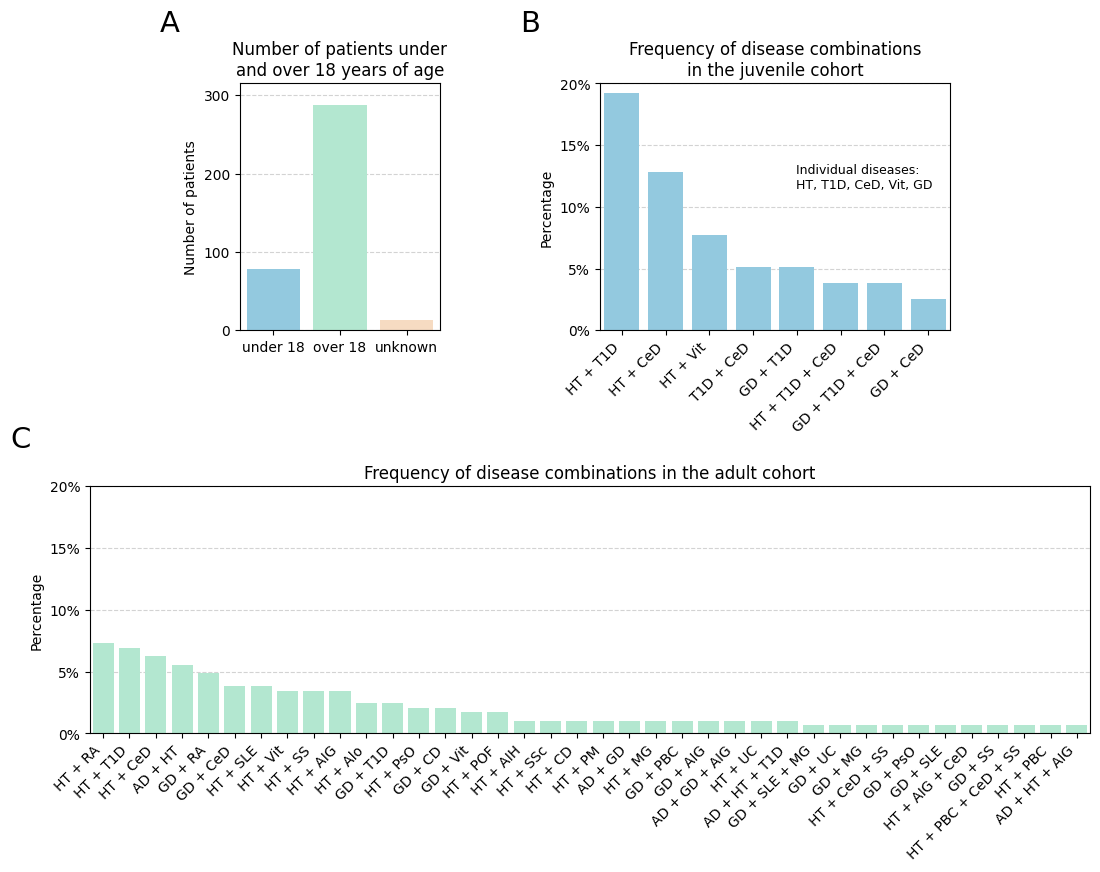

In [13]:
# to set text sizes for the figure
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=9)

# figure
fig = plt.figure(figsize=(10,6.5))
ax1 = fig.add_axes([0.15,0.62,0.2,0.38])
ax2 = fig.add_axes([0.51,0.62,0.35,0.38])
ax3 = fig.add_axes([0,0,1,0.38])

# A
sns.barplot(data=ageRank_grouped, x='age_rank', y='count', hue='age_rank', palette=cmapA, 
            order=['under 18', 'over 18', 'unknown'], ax=ax1)
ax1.set_title('Number of patients under\nand over 18 years of age')
ax1.set_ylim(0,315)
ax1.set_yticks(ticks=[0, 100, 200, 300])
ax1.set_ylabel('Number of patients')
#ax2.set_xticks(['under 18', 'over 18', 'uknown'])
#ax2.set_xticklabels(['under 18', 'over 18', 'uknown'], rotation=45, ha='right')
ax1.set_xlabel('')
ax1.set_axisbelow(True)
ax1.grid(color = 'lightgrey', linestyle = '--', axis='y')

# B
data1 = comb_freq_under18[comb_freq_under18['count'] > 1]   # to deselect individual combinations
sns.barplot(data=data1, x='combinations', y='percentage', color='#87ceeb', ax=ax2)
ax2.set_title('Frequency of disease combinations\nin the juvenile cohort')
ax2.set_ylim(0,20)
ax2.set_yticks(ticks=[0, 5, 10, 15, 20], labels=['0%', '5%', '10%', '15%', '20%'])
ax2.set_ylabel('Percentage')
ax2.set_xticks(data1['combinations'])
ax2.set_xticklabels(data1['combinations'], rotation=45, ha='right')
ax2.set_xlabel('')
ax2.set_axisbelow(True)
ax2.grid(color = 'lightgrey', linestyle = '--', axis='y')
ax2.text(3.9, 11.5, ' Individual diseases: \n HT, T1D, CeD, Vit, GD', fontsize=9)

# C
data2 = comb_freq_over18[comb_freq_over18['count'] > 1]   # to deselect individual combinations
sns.barplot(data=data2, x='combinations', y='percentage', color='#aaf0d1', ax=ax3)
ax3.set_title('Frequency of disease combinations in the adult cohort')
ax3.set_ylim(0,20)
ax3.set_yticks(ticks=[0, 5, 10, 15, 20], labels=['0%', '5%', '10%', '15%', '20%'])
ax3.set_ylabel('Percentage')
ax3.set_xticks(data2['combinations'])
ax3.set_xticklabels(data2['combinations'], rotation=45, ha='right')
ax3.set_xlabel('')
ax3.set_axisbelow(True)
ax3.grid(color = 'lightgrey', linestyle = '--', axis='y')

# lettering for the figure
fig.text(0.07, 1.08, 'A', fontsize=21)
fig.text(0.43, 1.08, 'B', fontsize=21)
fig.text(-0.08, 0.44, 'C', fontsize=21)

#fig.savefig('uo18_APS.tiff', bbox_inches='tight', dpi=300);